In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

from sklearn.decomposition import PCA

from utils import Cifar10

import warnings
warnings.filterwarnings("ignore")

path = "../data/cifar-10-batches-py"

# Load Data

In [2]:
dataset = Cifar10(path)

# Reducing the dimensionality of the data using PCA

Below is the code to load the flattened images and labels of CIFAR-10 dataset. The images are flattened to a vector of 3072 elements (32x32x3). PCA is applied to reduce the dimensionality of the data to 128, with over 90% of the variance explained.

In [3]:
X_train, y_train = dataset.get_train(flatten=True)
X_test, y_test = dataset.get_test(flatten=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 3072), (50000,), (10000, 3072), (10000,))

In [4]:
pca = PCA(n_components=128)
pca.fit(X_train)
pca.explained_variance_ratio_.sum()

0.9184662383494273

In [5]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((50000, 128), (10000, 128))

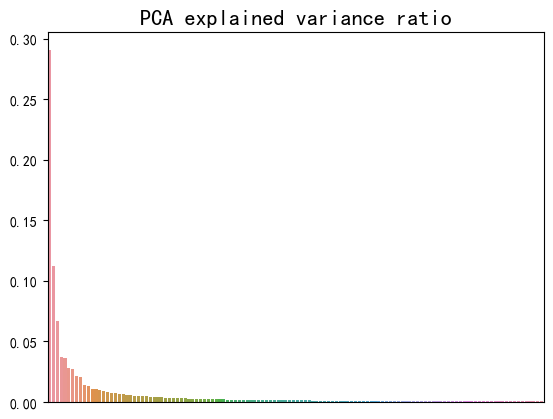

In [12]:
sns.barplot(x=np.arange(1, 129), y=pca.explained_variance_ratio_)
plt.title("PCA explained variance ratio", fontsize=16)
plt.xticks([])
plt.show()

# Your code goes here